In [147]:
import numpy as np
from skimage.transform import rotate
from keras.datasets.mnist import load_data
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [167]:
digit = x_train[0]
digit = digit / digit.max()
digit.min(), digit.max()

(0.0, 1.0)

## No smoothing

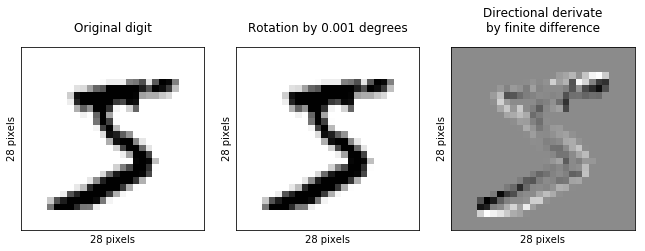

In [198]:
fig = plt.figure(figsize=(12, 4))

fig.add_subplot(141)
plt.title('Original digit', y=1.05)
plt.imshow(digit, cmap='gray_r')
plt.xticks([]); plt.yticks([])
plt.xlabel('28 pixels'); plt.ylabel('28 pixels')

fig.add_subplot(142)
angle = 1e-3
plt.title(f'Rotation by {angle} degrees', y=1.05)
rotated_digit = rotate(digit, angle, resize=False)
plt.imshow(rotated_digit, cmap='gray_r')
plt.xticks([]); plt.yticks([])
plt.xlabel('28 pixels'); plt.ylabel('28 pixels')

fig.add_subplot(143)
plt.title('Directional derivate\nby finite difference', y=1.05)
plt.imshow((digit - rotated_digit) / angle, cmap='gray_r')
plt.xticks([]); plt.yticks([])
plt.xlabel('28 pixels'); plt.ylabel('28 pixels')

plt.tight_layout()
plt.show()

## With smoothing

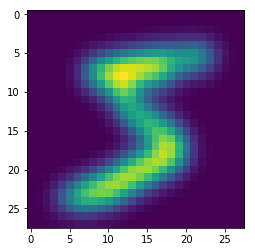

In [133]:
plt.imshow(gaussian_filter(x_train[0], sigma=1.5))

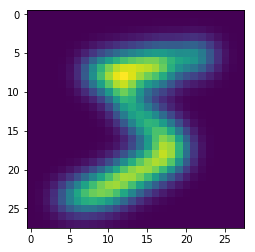

In [134]:
plt.imshow(gaussian_filter(rotated_img, sigma=1.5))

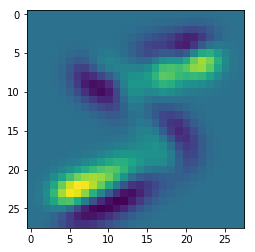

In [135]:
plt.imshow(gaussian_filter(x_train[0] / x_train[0].max(), sigma=1.5) - gaussian_filter(rotated_img, sigma=1.5))
plt.show()